In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df.shape

(205, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [11]:
df = df.drop(['car_ID'], axis=1)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [12]:
df['company'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df.drop('CarName', axis=1, inplace=True)
unique_companies = df['company'].unique()
print(unique_companies)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [13]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [14]:
corrections = {
     'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'toyouta': 'toyota',
    'porcshce': 'porsche',
    'maxda':'mazda',
    'nissan':'Nissan'
    }
df['company'] = df['company'].replace(corrections)
companies = df['company'].unique()
companies

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [15]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'company'],
      dtype='object')

In [16]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

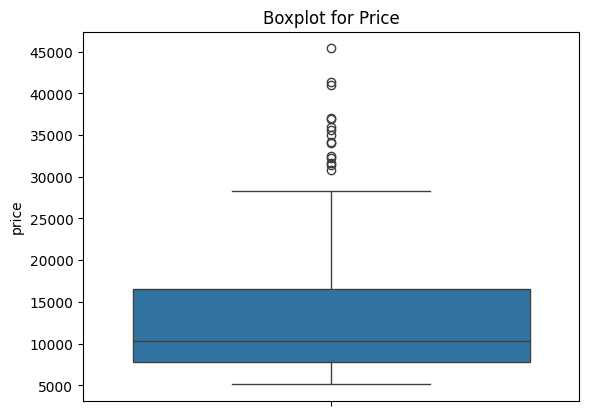

In [17]:
sns.boxplot(df['price'])
plt.title("Boxplot for Price")
plt.show()

In [18]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1 = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print("Data after removing outliers:")
print(df1)

Data after removing outliers:
     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            3         1           0           1        0           2   
1            3         1           0           1        0           2   
2            1         1           0           1        2           2   
3            2         1           0           0        3           1   
4            2         1           0           0        3           0   
..         ...       ...         ...         ...      ...         ...   
200         -1         1           0           0        3           2   
201         -1         1           1           0        3           2   
202         -1         1           0           0        3           2   
203         -1         0           1           0        3           2   
204         -1         1           1           0        3           2   

     enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  \
0                 0  

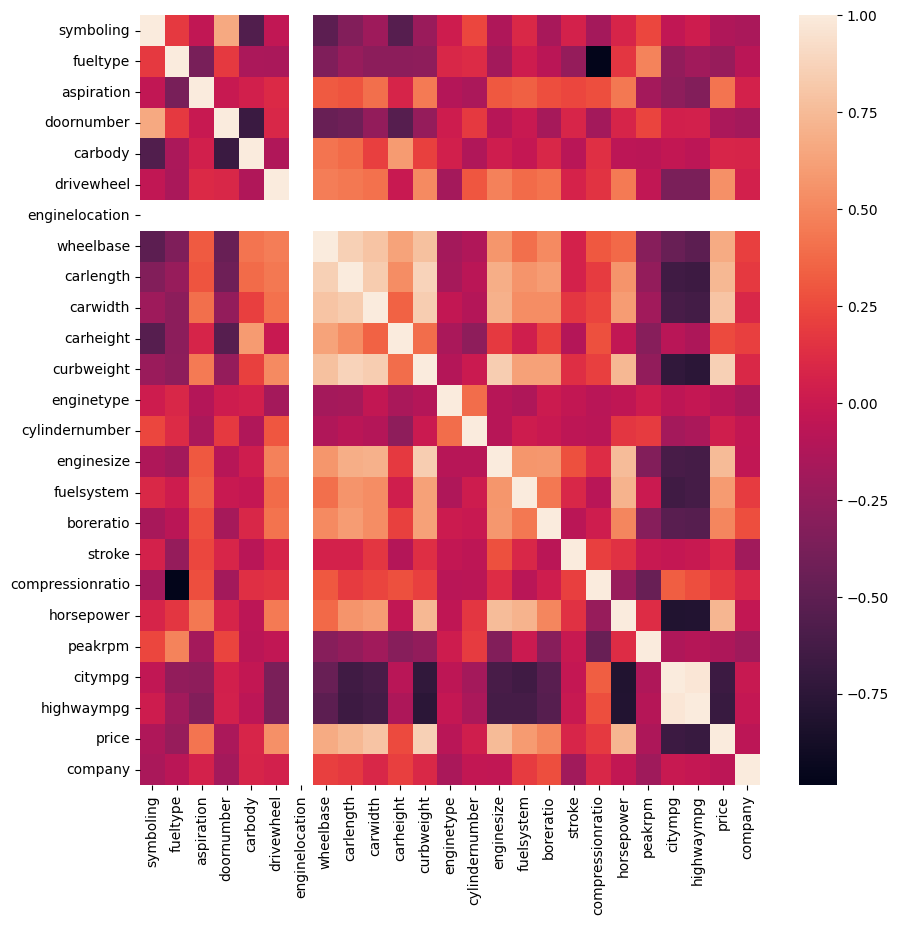

In [19]:
correlation_matrix = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr())
plt.show()

In [23]:
upper_triangle_mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
correlation_threshold = 0.85
target_var = 'price'
columns_to_drop = set()
for row in range(len(correlation_matrix.columns)):
    for col in range(row):
        if correlation_matrix.iloc[row, col] > correlation_threshold:
            col_name_row = correlation_matrix.columns[row]
            col_name_col = correlation_matrix.columns[col]

            if col_name_row != target_var:
                columns_to_drop.add(col_name_row)
            if col_name_col != target_var:
                columns_to_drop.add(col_name_col)
filtered_df = df1.drop(columns=[col for col in columns_to_drop if col != target_var])
print("Columns removed due to multicollinearity (excluding target variable):")
print([col for col in columns_to_drop if col != target_var])
print("Remaining columns:")
print(filtered_df.columns)

Columns removed due to multicollinearity (excluding target variable):
['wheelbase', 'citympg', 'carlength', 'curbweight', 'highwaympg']
Remaining columns:
Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'carwidth', 'carheight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'company'],
      dtype='object')


In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(reduced_correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix After Removing Multicollinearity')
plt.show()

NameError: name 'reduced_correlation_matrix' is not defined

<Figure size 1000x800 with 0 Axes>

In [27]:
X = filtered_df.drop(columns=target_var)  
y = filtered_df[target_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set features shape:", X_train.shape)
print("Testing set features shape:", X_test.shape)
print("Training set target shape:", y_train.shape)
print("Testing set target shape:", y_test.shape)

Training set features shape: (152, 19)
Testing set features shape: (38, 19)
Training set target shape: (152,)
Testing set target shape: (38,)


In [28]:
LReg = LinearRegression()
LReg.fit(X_train, y_train)

LinearRegression()

In [29]:
LReg.score(X_test,y_test)

0.8074896353118153

In [30]:
predict_LReg = LReg.predict(X_test)
predict_LReg

array([ 6579.60930938, 15497.3980396 ,  6297.74016052,  6738.4668781 ,
       18829.28314628,  3510.37430011, 14971.40392842,  7460.70864105,
        6844.42355255,  7149.17033434,  6463.37267818, 20095.19033839,
        6774.82092439, 18183.23967807,  8694.64669485, 13106.09916326,
       15869.28824563,  6738.4668781 , 10877.97284739,  7238.57767286,
        7003.37333856,  8796.38607833, 13001.98194761, 18829.28314628,
        8857.99457772,  9594.95406886,  7343.19261979,  6767.61281319,
        7368.87571518,  8495.19621934,  8762.25854162,  6738.4668781 ,
       12357.04535585, 10123.35236524,  9579.99422212, 18183.23967807,
        7960.7209124 ,  8999.56049146])

In [31]:
import math
rmse_LReg = math.sqrt(mean_squared_error(predict_LReg, y_test))
mse_LReg = mean_squared_error(y_test, predict_LReg)
r2_LReg = r2_score(y_test, predict_LReg)
print("Linear Regression - MSE:", mse_LReg)
print("Linear Regression - RMSE:", rmse_LReg)
print("Linear Regression - R2 Score:", r2_LReg)

Linear Regression - MSE: 3236009.8200310995
Linear Regression - RMSE: 1798.891275211234
Linear Regression - R2 Score: 0.8074896353118153


In [32]:
DTReg = DecisionTreeRegressor()
DTReg.fit(X_train, y_train)
predict_DTReg = DTReg.predict(X_test)
mse_DTReg = mean_squared_error(y_test, predict_DTReg)
rmse_DTReg = math.sqrt(mse_DTReg)
r2_DTReg = r2_score(y_test, predict_DTReg)
print("Decision Tree Regression - Mean Squared Error:", mse_DTReg)
print("Decision Tree Regression - Root Mean Squared Error:", rmse_DTReg)
print("Decision Tree Regression - R2 Score:", r2_DTReg)

Decision Tree Regression - Mean Squared Error: 4429892.41668129
Decision Tree Regression - Root Mean Squared Error: 2104.7309606411195
Decision Tree Regression - R2 Score: 0.7364655078035136


In [33]:
RFReg = RandomForestRegressor()
RFReg.fit(X_train, y_train)
predict_RFReg = RFReg.predict(X_test)
mse_RFReg = mean_squared_error(y_test, predict_RFReg)
rmse_RFReg = math.sqrt(mse_RFReg)
r2_RFReg = r2_score(y_test, predict_RFReg)
print("Random Forest Regressor - Mean Squared Error:", mse_RFReg)
print("Random Forest Regressor - Root Mean Squared Error:", rmse_RFReg)
print("Random Forest Regressor - R^2 Score:", r2_RFReg)

Random Forest Regressor - Mean Squared Error: 1861899.5913895431
Random Forest Regressor - Root Mean Squared Error: 1364.514415969851
Random Forest Regressor - R^2 Score: 0.8892355124720424


In [34]:
GBReg = GradientBoostingRegressor()
GBReg.fit(X_train, y_train)
predict_GBReg = GBReg.predict(X_test)
mse_GBReg = mean_squared_error(y_test, predict_GBReg)
rmse_GBReg = math.sqrt(mse_GBReg)
r2_GBReg = r2_score(y_test, predict_GBReg)
print("Gradient Boosting Regressor - Mean Squared Error:", mse_GBReg)
print("Gradient Boosting Regressor - Root Mean Squared Error:", rmse_GBReg)
print("Gradient Boosting Regressor - R^2 Score:", r2_GBReg)

Gradient Boosting Regressor - Mean Squared Error: 2042461.5295381856
Gradient Boosting Regressor - Root Mean Squared Error: 1429.1471336213726
Gradient Boosting Regressor - R^2 Score: 0.8784938749323062


In [35]:
svr = SVR()
svr.fit(X_train, y_train)
predict_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, predict_svr)
rmse_svr = mse_svr ** 0.5
r2_svr = r2_score(y_test,predict_svr)
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr}")
print(f"R² Score: {r2_svr}")

Mean Squared Error (MSE): 17228185.891430188
Root Mean Squared Error (RMSE): 4150.684990628678
R² Score: -0.024905526659740218


#### Top-Performing Model: The Random Forest Regressor stands out as the top performer, achieving the lowest error metrics and the highest R² score. It effectively captures the data relationships better than the other models.

#### The findings suggest that ensemble methods, with the Random Forest Regressor being particularly effective, offer the most reliable predictions for car prices in this scenario. These insights can be utilized by the Chinese automobile company to refine their car designs and pricing strategies, enhancing their chances of success in the U.S. market.